In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_1','Unnamed: 0','text'], axis=1, inplace=True)
df.head()

,Unnamed: 0.1,_id,task_2,text_clean
0,0,60c5d6bf5659ea5e55defa2c,PRFN,made amp amp onli abl start make money sustain...
1,1,60c5d6bf5659ea5e55def461,OFFN,technic still turn back clock dick head
2,2,60c5d6bf5659ea5e55defaad,NONE,govt stop think world media liber gang ani opt...
3,3,60c5d6bf5659ea5e55def419,OFFN,soldier japan dick head
4,4,60c5d6bf5659ea5e55def7fa,OFFN,would better ask think sleazi shitbag lmao


Text(0, 0.5, 'Frequency')

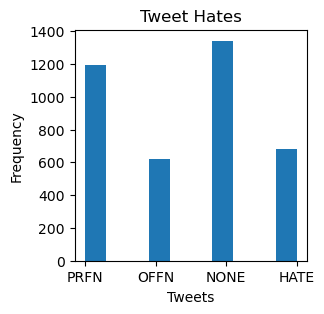

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_2'])

ax.set_title('Tweet Hates')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_2']

In [5]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[ 34  19  40   3]
 [ 46  58  60  33]
 [ 26  15  36  27]
 [  6  20  27 127]]
              precision    recall  f1-score   support

           0       0.30      0.35      0.33        96
           1       0.52      0.29      0.38       197
           2       0.22      0.35      0.27       104
           3       0.67      0.71      0.69       180

    accuracy                           0.44       577
   macro avg       0.43      0.43      0.41       577
weighted avg       0.48      0.44      0.45       577



In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[ 35  42  16   3]
 [ 15 150   9  23]
 [ 34  25  17  28]
 [  0  15   3 162]]
              precision    recall  f1-score   support

           0       0.42      0.36      0.39        96
           1       0.65      0.76      0.70       197
           2       0.38      0.16      0.23       104
           3       0.75      0.90      0.82       180

    accuracy                           0.63       577
   macro avg       0.55      0.55      0.53       577
weighted avg       0.59      0.63      0.60       577



C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[ 13  69   8   6]
 [ 11 154   7  25]
 [  9  53   9  33]
 [  0  26   2 152]]
              precision    recall  f1-score   support

           0       0.39      0.14      0.20        96
           1       0.51      0.78      0.62       197
           2       0.35      0.09      0.14       104
           3       0.70      0.84      0.77       180

    accuracy                           0.57       577
   macro avg       0.49      0.46      0.43       577
weighted avg       0.52      0.57      0.51       577



In [10]:
dt3=classifier

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[ 40  36  18   2]
 [ 30 131  12  24]
 [ 37  21  16  30]
 [  1  15   3 161]]
              precision    recall  f1-score   support

           0       0.37      0.42      0.39        96
           1       0.65      0.66      0.65       197
           2       0.33      0.15      0.21       104
           3       0.74      0.89      0.81       180

    accuracy                           0.60       577
   macro avg       0.52      0.53      0.52       577
weighted avg       0.57      0.60      0.58       577



In [12]:
dt1=classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 48)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[ 32  42  18   4]
 [ 29 124  19  25]
 [ 25  30  25  24]
 [  7  21  22 130]]
              precision    recall  f1-score   support

           0       0.34      0.33      0.34        96
           1       0.57      0.63      0.60       197
           2       0.30      0.24      0.27       104
           3       0.71      0.72      0.72       180

    accuracy                           0.54       577
   macro avg       0.48      0.48      0.48       577
weighted avg       0.53      0.54      0.53       577



In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[ 34  42  15   5]
 [ 24 139   9  25]
 [ 22  41  14  27]
 [  3  21   8 148]]
              precision    recall  f1-score   support

           0       0.41      0.35      0.38        96
           1       0.57      0.71      0.63       197
           2       0.30      0.13      0.19       104
           3       0.72      0.82      0.77       180

    accuracy                           0.58       577
   macro avg       0.50      0.50      0.49       577
weighted avg       0.54      0.58      0.55       577



In [15]:
from sklearn.model_selection import RepeatedKFold

In [16]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score



C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.6285714285714286


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.6354166666666666


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.6484375


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [17]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.52      0.53        67
           1       0.60      0.63      0.61       118
           2       0.44      0.25      0.32        67
           3       0.69      0.81      0.75       132

    accuracy                           0.61       384
   macro avg       0.56      0.55      0.55       384
weighted avg       0.59      0.61      0.59       384



In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.6493506493506493
0.6597402597402597
0.6649350649350649
0.6666666666666666
0.6701298701298701
0.6857142857142857


In [19]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.42      0.28      0.34        74
           1       0.70      0.77      0.74       142
           2       0.41      0.25      0.31        59
           3       0.76      0.97      0.85       109

    accuracy                           0.66       384
   macro avg       0.57      0.57      0.56       384
weighted avg       0.62      0.66      0.63       384



In [20]:
dt2=rf

In [21]:
import pickle

# 假设 dt1, dt2, dt3 是你已经训练好的模型
pickle.dump(dt1, open('finalized_svc_model1.sav', 'wb'))
pickle.dump(dt2, open('finalized_rfc_model1.sav', 'wb'))
pickle.dump(dt3, open('finalized_Knc_model1.sav', 'wb'))
